<a href="https://colab.research.google.com/github/Rivianee/data-science/blob/master/TESTEUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TESTE REALIZADO POR RIVIANE MARIA ALBUQUERQUE DONHA**

In [15]:
from google.colab import files

# Faça o upload do arquivo CSV
uploaded = files.upload()

Saving raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj.csv to raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj (1).csv


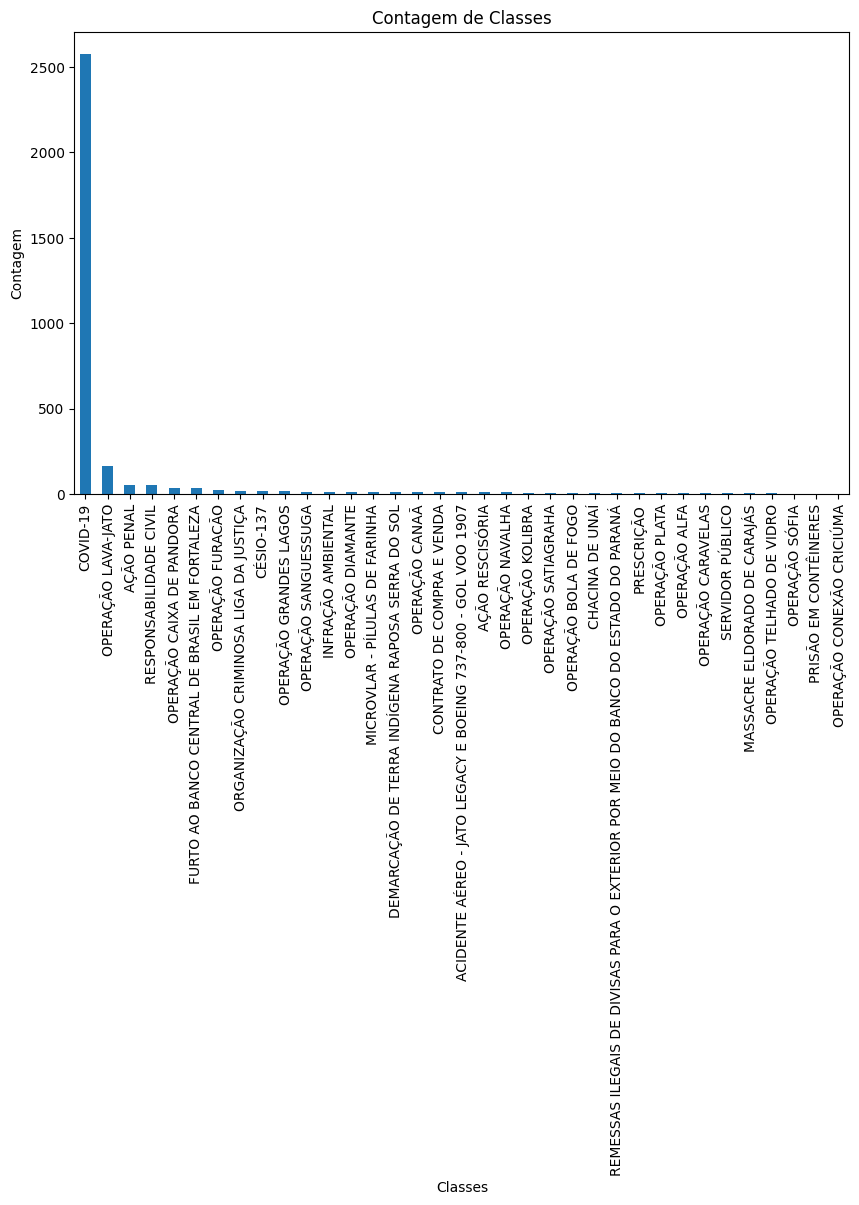

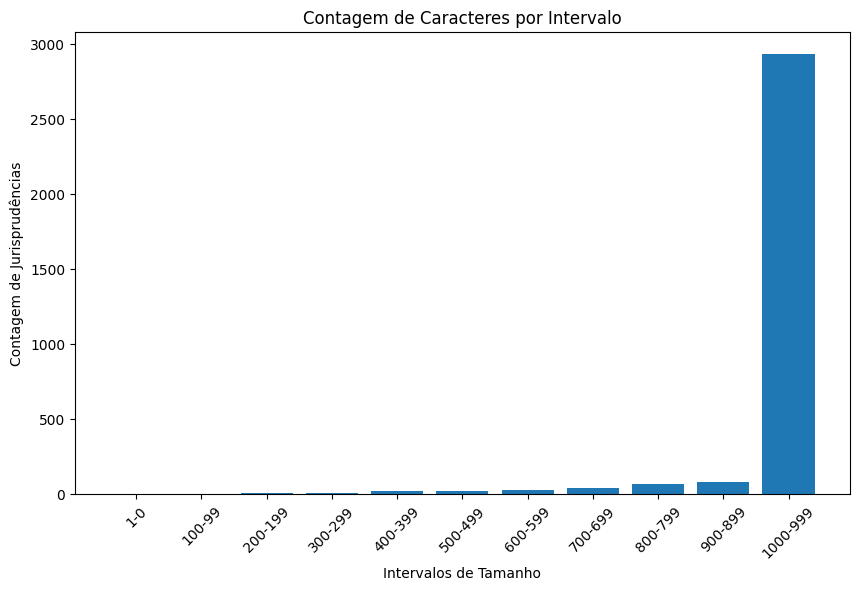

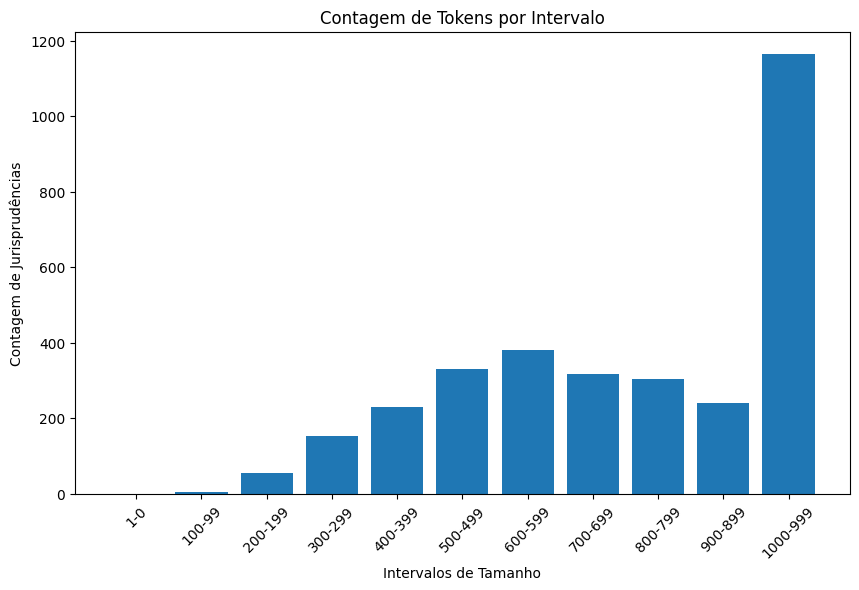

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer

# Carregue os dados do arquivo CSV (substitua 'seu_arquivo.csv' pelo caminho real).
data = pd.read_csv('/content/raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj (1).csv', delimiter='|')

# Gráfico de contagem de classes
class_counts = data['assunto'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Contagem de Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()

# Pré-processamento TF-IDF para contar caracteres
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['ementa'])

# Contagem de caracteres por jurisprudência
char_counts = [len(ementa) for ementa in data['ementa']]
char_intervals = [0, 99, 199, 299, 399, 499, 599, 699, 799, 899, 999]
char_counts_by_interval = [0] * len(char_intervals)

for count in char_counts:
    for i, interval in enumerate(char_intervals):
        if i == 0 and count <= interval:
            char_counts_by_interval[i] += 1
        elif i == len(char_intervals) - 1 and count >= interval:
            char_counts_by_interval[i] += 1
        elif char_intervals[i - 1] < count <= interval:
            char_counts_by_interval[i] += 1

# Gráfico de contagem de caracteres por intervalo
plt.figure(figsize=(10, 6))
plt.bar([f'{char_intervals[i]+1}-{interval}' for i, interval in enumerate(char_intervals)], char_counts_by_interval)
plt.title('Contagem de Caracteres por Intervalo')
plt.xlabel('Intervalos de Tamanho')
plt.ylabel('Contagem de Jurisprudências')
plt.xticks(rotation=45)
plt.show()

# Tokenize os dados para contar tokens
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_tokens = tokenizer(data['ementa'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt', add_special_tokens=True)

# Contagem de tokens por jurisprudência
token_counts = [len(tokenizer.tokenize(ementa)) for ementa in data['ementa']]
token_intervals = [0, 99, 199, 299, 399, 499, 599, 699, 799, 899, 999]
token_counts_by_interval = [0] * len(token_intervals)

for count in token_counts:
    for i, interval in enumerate(token_intervals):
        if i == 0 and count <= interval:
            token_counts_by_interval[i] += 1
        elif i == len(token_intervals) - 1 and count >= interval:
            token_counts_by_interval[i] += 1
        elif token_intervals[i - 1] < count <= interval:
            token_counts_by_interval[i] += 1

# Gráfico de contagem de tokens por intervalo
plt.figure(figsize=(10, 6))
plt.bar([f'{token_intervals[i]+1}-{interval}' for i, interval in enumerate(token_intervals)], token_counts_by_interval)
plt.title('Contagem de Tokens por Intervalo')
plt.xlabel('Intervalos de Tamanho')
plt.ylabel('Contagem de Jurisprudências')
plt.xticks(rotation=45)
plt.show()

In [21]:

# Use a variável class_counts para obter os nomes das classes
lista_de_classes = class_counts.index.tolist()

# Imprima o nome das classes
for classe in lista_de_classes:
    print(classe)

COVID-19
OPERAÇÃO LAVA-JATO
AÇÃO PENAL
RESPONSABILIDADE CIVIL
OPERAÇÃO CAIXA DE PANDORA
FURTO AO BANCO CENTRAL DE BRASIL EM FORTALEZA
OPERAÇÃO FURACÃO
ORGANIZAÇÃO CRIMINOSA LIGA DA JUSTIÇA
CÉSIO-137
OPERAÇÃO GRANDES LAGOS
OPERAÇÃO SANGUESSUGA
INFRAÇÃO AMBIENTAL
OPERAÇÃO DIAMANTE
MICROVLAR - PÍLULAS DE FARINHA
DEMARCAÇÃO DE TERRA INDÍGENA RAPOSA SERRA DO SOL
OPERAÇÃO CANAÃ
CONTRATO DE COMPRA E VENDA
ACIDENTE AÉREO - JATO LEGACY E BOEING 737-800 - GOL VOO 1907
AÇÃO RESCISÓRIA
OPERAÇÃO NAVALHA
OPERAÇÃO KOLIBRA
OPERAÇÃO SATIAGRAHA
OPERAÇÃO BOLA DE FOGO
CHACINA DE UNAÍ
REMESSAS ILEGAIS DE DIVISAS PARA O EXTERIOR POR MEIO DO BANCO DO ESTADO DO PARANÁ
PRESCRIÇÃO
OPERAÇÃO PLATA
OPERAÇÃO ALFA
OPERAÇÃO CARAVELAS
SERVIDOR PÚBLICO
MASSACRE ELDORADO DE CARAJÁS
OPERAÇÃO TELHADO DE VIDRO
OPERAÇÃO SÓFIA
PRISÃO EM CONTÊINERES
OPERAÇÃO CONEXÃO CRICIÚMA


In [18]:
pip install wordcloud -q

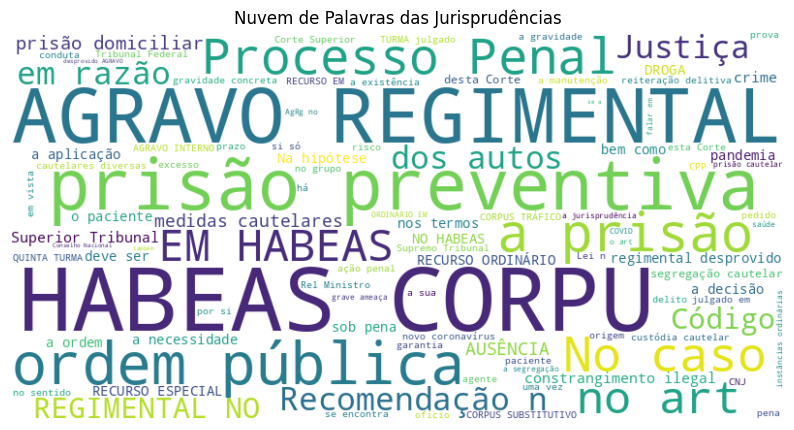

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Carregue os dados do arquivo CSV (substitua 'seu_arquivo.csv' pelo caminho real).
data = pd.read_csv('/content/raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj (1).csv', delimiter='|')

# Concatene todas as jurisprudências em um único texto
all_text = ' '.join(data['ementa'])

# Cria uma lista de stop words
stopwords = ['que', 'e', 'ou', 'mas', 'é', 'do', 'de', 'para', 'poder', 'dever', 'haver', 'não', 'com', 'no caso', 'da', 'em razão']

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', stopwords=stopwords).generate(all_text)

# Plota a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras das Jurisprudências')
plt.axis('off')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Carregue os dados do arquivo CSV (substitua 'seu_arquivo.csv' pelo caminho real).
data = pd.read_csv('/content/raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj (1).csv', delimiter='|')

# Suponha que você já tenha as classes como uma lista (lista_de_classes)

# Divida os dados em treinamento e teste com uma proporção de 75% treinamento e 25% teste
X_train, X_test, y_train, y_test = train_test_split(data['ementa'], data['assunto'], test_size=0.25, random_state=42)

# Vetorize os dados de texto usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words=None)  # Removendo stop_words
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Treine um modelo (por exemplo, Regressão Logística)
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)

# Avalie o modelo TF-IDF
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)
print(report_tfidf)

                                                                                   precision    recall  f1-score   support

                     ACIDENTE AÉREO - JATO LEGACY E BOEING 737-800 - GOL VOO 1907       0.00      0.00      0.00         3
                                                                       AÇÃO PENAL       0.67      0.50      0.57        12
                                                                  AÇÃO RESCISÓRIA       0.00      0.00      0.00         3
                                                       CONTRATO DE COMPRA E VENDA       0.00      0.00      0.00         3
                                                                         COVID-19       0.85      1.00      0.92       630
                                                                        CÉSIO-137       1.00      0.25      0.40         4
                                 DEMARCAÇÃO DE TERRA INDÍGENA RAPOSA SERRA DO SOL       0.00      0.00      0.00         5
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

# Carregue os dados do arquivo CSV (substitua 'seu_arquivo.csv' pelo caminho real).
data = pd.read_csv('/content/raw.githubusercontent.com_alfaneo-ai_brazilian-legal-text-dataset_main_resources_raw_pesquisas_prontas_stj.csv', delimiter='|')

# Mapeie as classes de string para números inteiros
class_to_int = {cls: idx for idx, cls in enumerate(data['assunto'].unique())}
data['label'] = data['assunto'].map(class_to_int)

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data['ementa'], data['label'], test_size=0.25, random_state=42, stratify=data['label'])

# Crie o modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_to_int))

# Tokenize os dados de texto
max_length = 128  # Você pode ajustar isso conforme necessário
X_train_tokens = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length, return_tensors='pt', add_special_tokens=True)
X_test_tokens = tokenizer(list(X_test), truncation=True, padding=True, max_length=max_length, return_tensors='pt', add_special_tokens=True)

# Crie o DataLoader para o modelo BERT
batch_size = 8
train_data = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train.values))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Defina os hiperparâmetros de treinamento
learning_rate = 2e-5
epochs = 3
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

# Treine o modelo BERT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in tqdm(range(epochs)):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

# Avalie o modelo no conjunto de teste
model.eval()
y_pred_bert = []
for i in tqdm(range(0, len(X_test_tokens['input_ids']), batch_size)):
    with torch.no_grad():
        inputs = {'input_ids': X_test_tokens['input_ids'][i:i+batch_size].to(device),
                  'attention_mask': X_test_tokens['attention_mask'][i:i+batch_size].to(device)}
        outputs = model(**inputs)
        logits = outputs.logits
        y_pred_bert.extend(np.argmax(logits.cpu().numpy(), axis=1))

# Relate as classes aos números inteiros novamente
int_to_class = {idx: cls for cls, idx in class_to_int.items()}
y_test_labels = [int_to_class[idx] for idx in y_test.values]
y_pred_bert = [int_to_class[idx] for idx in y_pred_bert]

# Avalie o desempenho do modelo BERT
print("Avaliação do Modelo BERT:")
print(classification_report(y_test_labels, y_pred_bert))
print("Acurácia:", accuracy_score(y_test_labels, y_pred_bert))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 100/100 [05:31<00:00,  3.32s/it]

Avaliação do Modelo BERT:
                                                                                   precision    recall  f1-score   support

                     ACIDENTE AÉREO - JATO LEGACY E BOEING 737-800 - GOL VOO 1907       0.00      0.00      0.00         2
                                                                       AÇÃO PENAL       0.50      0.31      0.38        13
                                                                  AÇÃO RESCISÓRIA       0.00      0.00      0.00         2
                                                                  CHACINA DE UNAÍ       0.00      0.00      0.00         2
                                                       CONTRATO DE COMPRA E VENDA       0.00      0.00      0.00         3
                                                                         COVID-19       0.97      0.98      0.97       645
                                                                        CÉSIO-137       0.00      0.00      0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

   Modelo  Acurácia  Precisão (weighted avg)  Recall (weighted avg)  \
0  TF-IDF  0.860377                 0.776136               0.860377   
1    BERT  0.861635                 0.822019               0.861635   

   F1-score (weighted avg)  
0                 0.810495  
1                 0.835210  


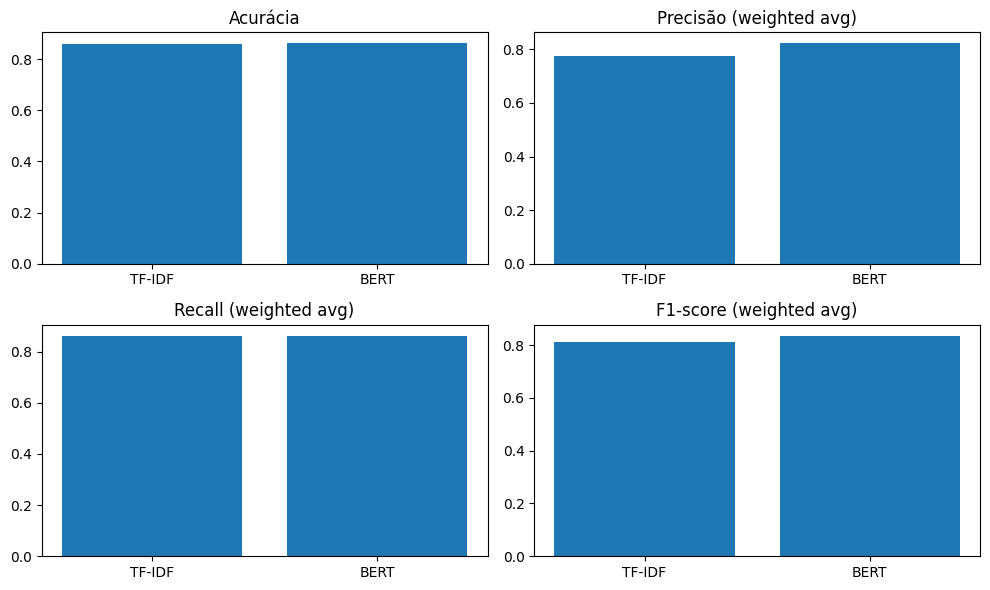

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Resultados do modelo TF-IDF
report_tfidf = classification_report(y_test, y_pred_tfidf, output_dict=True)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Resultados do modelo BERT
report_bert = classification_report(y_test_labels, y_pred_bert, output_dict=True)
accuracy_bert = accuracy_score(y_test_labels, y_pred_bert)

# Crie um DataFrame para comparar as métricas
data = {
    'Modelo': ['TF-IDF', 'BERT'],
    'Acurácia': [accuracy_tfidf, accuracy_bert],
    'Precisão (weighted avg)': [report_tfidf['weighted avg']['precision'], report_bert['weighted avg']['precision']],
    'Recall (weighted avg)': [report_tfidf['weighted avg']['recall'], report_bert['weighted avg']['recall']],
    'F1-score (weighted avg)': [report_tfidf['weighted avg']['f1-score'], report_bert['weighted avg']['f1-score']]
}

df = pd.DataFrame(data)

# Exiba a tabela comparativa
print(df)

# Crie gráficos comparativos
plt.figure(figsize=(10, 6))

# Acurácia
plt.subplot(2, 2, 1)
plt.bar(df['Modelo'], df['Acurácia'])
plt.title('Acurácia')

# Precisão
plt.subplot(2, 2, 2)
plt.bar(df['Modelo'], df['Precisão (weighted avg)'])
plt.title('Precisão (weighted avg)')

# Recall
plt.subplot(2, 2, 3)
plt.bar(df['Modelo'], df['Recall (weighted avg)'])
plt.title('Recall (weighted avg)')

# F1-score
plt.subplot(2, 2, 4)
plt.bar(df['Modelo'], df['F1-score (weighted avg)'])
plt.title('F1-score (weighted avg)')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import classification_report, accuracy_score

# Resultados do modelo TF-IDF
report_tfidf = classification_report(y_test, y_pred_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("Métricas do Modelo TF-IDF:")
print(report_tfidf)
print("Acurácia TF-IDF:", accuracy_tfidf)

# Resultados do modelo BERT
report_bert = classification_report(y_test_labels, y_pred_bert)
accuracy_bert = accuracy_score(y_test_labels, y_pred_bert)

print("\nMétricas do Modelo BERT:")
print(report_bert)
print("Acurácia BERT:", accuracy_bert)

Métricas do Modelo TF-IDF:
                                                                                   precision    recall  f1-score   support

                     ACIDENTE AÉREO - JATO LEGACY E BOEING 737-800 - GOL VOO 1907       0.00      0.00      0.00         3
                                                                       AÇÃO PENAL       0.67      0.50      0.57        12
                                                                  AÇÃO RESCISÓRIA       0.00      0.00      0.00         3
                                                       CONTRATO DE COMPRA E VENDA       0.00      0.00      0.00         3
                                                                         COVID-19       0.85      1.00      0.92       630
                                                                        CÉSIO-137       1.00      0.25      0.40         4
                                 DEMARCAÇÃO DE TERRA INDÍGENA RAPOSA SERRA DO SOL       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# ***Aqui estão os resultados das métricas para os modelos TF-IDF e BERT: ***


# Acurácia TF-IDF: 0.8603773584905661
# Acurácia BERT: 0.8616352201257862

Ambos os modelos apresentaram uma acurácia semelhante de aproximadamente 86%,  mas há uma pequena diferença entre elas. O modelo BERT parece ter uma acurácia ligeiramente superior, embora seja uma diferença bastante pequena.

Mas ao analisar as métricas de precisão, recall e F1-score para cada classe, você pode ver que os resultados variam para cada classe. Em particular, o modelo BERT parece ter um desempenho melhor em algumas classes, enquanto o modelo TF-IDF pode ter um desempenho melhor em outras. Dependendo de suas necessidades específicas, você pode escolher o modelo que melhor atende aos seus critérios de desempenho para classes individuais ou considerar outras métricas de avaliação para uma comparação mais completa.


